# 🛍️ Product Category Classifier for ShopEase E-Commerce
This project builds an Artificial Neural Network (ANN) to classify product descriptions into categories like clothing, electronics, etc.

In [52]:
from google.colab import files
uploaded = files.upload()


Saving Product Category Classifier for ShopEase E-Commerce.csv to Product Category Classifier for ShopEase E-Commerce (2).csv


In [53]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
 # 📁 Load Dataset in Colab
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


Saving Product Category Classifier for ShopEase E-Commerce.csv to Product Category Classifier for ShopEase E-Commerce (3).csv


,product_id,product_name,description,brand,color,size,price,material,target_category
0,P1000,Belt,Belt with high quality features for everyday use,Samsung,Black,NaN,3258.68,Wood,Accessories
1,P1001,Belt,Belt with high quality features for everyday use,Wildcraft,Green,S,1166.15,Leather,Accessories
2,P1002,Running Shoes,Running Shoes with high quality features for e...,Nike,Green,XL,497.23,Steel,Footwear
3,P1003,Skipping Rope,Skipping Rope with high quality features for e...,Roadster,White,1.5L,1262.66,Rubber,Sports
4,P1004,Belt,Belt with high quality features for everyday use,Roadster,White,1.5L,821.96,Silicon,Accessories


In [55]:
# 📊 Explore Data
df.info()
df.isnull().sum()
df['target_category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1000 non-null   object 
 1   product_name     1000 non-null   object 
 2   description      1000 non-null   object 
 3   brand            1000 non-null   object 
 4   color            1000 non-null   object 
 5   size             903 non-null    object 
 6   price            1000 non-null   float64
 7   material         1000 non-null   object 
 8   target_category  1000 non-null   object 
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


,count
target_category,
Clothing,182
Footwear,178
Sports,166
Electronics,163
Home Appliances,156
Accessories,155


In [56]:
# ✅ Preprocess Data

# Fill missing values in 'description' column
df['description'] = df['description'].fillna("")

# Encode the target categories
le = LabelEncoder()
df['categoryEncoded'] = le.fit_transform(df['target_category'])

# Convert descriptions to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(df['description']).toarray()

# One-hot encode target labels
y = to_categorical(df['categoryEncoded'])

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [57]:
# Build ANN Model
model = Sequential()
model.add(Dense(256, input_shape=(x.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,702 (178.52 KB)

 Trainable params: 45,702 (178.52 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# 🚂 Train Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.3163 - loss: 1.7534 - val_accuracy: 0.8550 - val_loss: 1.5812
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8397 - loss: 1.5236 - val_accuracy: 1.0000 - val_loss: 1.2660
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9607 - loss: 1.1804 - val_accuracy: 1.0000 - val_loss: 0.7761
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9975 - loss: 0.6982 - val_accuracy: 1.0000 - val_loss: 0.3120
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.2852 - val_accuracy: 1.0000 - val_loss: 0.0987
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1186 - val_accuracy: 1.0000 - val_loss: 0.0338
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0501 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0276 - val_accuracy: 1.0000 - val_

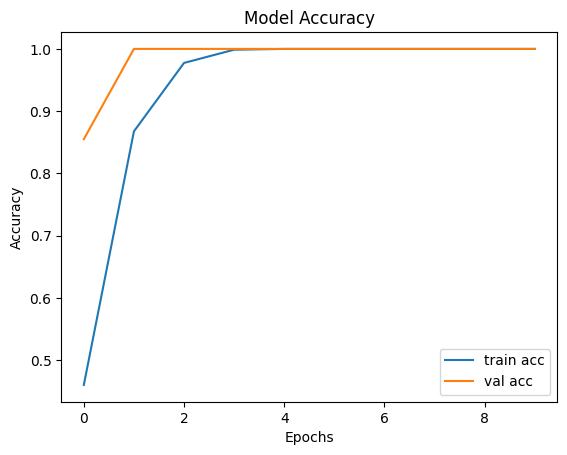

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
                 precision    recall  f1-score   support

    Accessories       1.00      1.00      1.00        36
       Clothing       1.00      1.00      1.00        35
    Electronics       1.00      1.00      1.00        31
       Footwear       1.00      1.00      1.00        35
Home Appliances       1.00      1.00      1.00        31
         Sports       1.00      1.00      1.00        32

       accuracy                           1.00       200
      macro avg       1.00      1.00      1.00       200
   weighted avg       1.00      1.00      1.00       200



In [59]:
# 📈 Evaluate Model
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Use lowercase x_test and y_test as defined earlier
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report using label encoder
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))


In [60]:
# 💾 Save Model and Vectorizer
import joblib
from tensorflow.keras.models import save_model, load_model

# ✅ Save the trained ANN model in modern .keras format
save_model(model, 'shopease_ann_model.keras')

# ✅ Save TF-IDF Vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# ✅ Save Label Encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [61]:
# 🧠 Final Step: Prediction on New Customer Inquiry
# Input
new_text = ["I need help with my payment failure."]

# Vectorize and convert to array to avoid retracing issues
X_input = tfidf.transform(new_text).toarray()

# Predict
y_pred = model.predict(X_input)

# Decode label
predicted_label = le.inverse_transform([y_pred.argmax(axis=1)[0]])[0]

print("Input:", new_text[0])
print("Predicted Category:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Input: I need help with my payment failure.
Predicted Category: Footwear
